<a href="https://colab.research.google.com/github/nolber03/Finanzas/blob/main/TP1/%2001_Portafolio_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Librerias

In [ ]:
import pandas as pd  # Manejo y análisis de datos estructurados (tablas)
import numpy as np  # Operaciones y funciones matemáticas avanzadas (arrays)
import matplotlib.pyplot as plt  # Generación de gráficos y visualizaciones
import yfinance as yf  # Descarga de datos financieros históricos
import seaborn as sns  # Visualización de datos estadísticos
sns.set()  # Configuración de estilo por defecto para gráficos de Seaborn
import scipy.stats as stats  # Funciones y distribuciones estadísticas
import cvxpy as cvx  # Optimización convexa y programación matemática

#2. Establecer data

In [ ]:
#Manual acorde al intervalo
#tickers = ['AAPL', 'GOOG', 'AMZN', 'META', 'TSLA']
#start_date = '2023-06-28'
#end_date = '2024-06-28'
#interval = '1d' #Por defecto extrae la data de yahoo finance en dias, pero se puede ajustar

#raw_data = yf.download(tickers=tickers, start=start_date, end=end_date, interval=interval, group_by='ticker', auto_adjust=True, threads=True)
# raw_data = raw_data.asfreq('m') Establecer frecuencia

In [ ]:
#Crear columnas, seleccionando los precios ajustados
#df_comp['aaple']= df_comp['AAPL'].Close
#df_comp['google']= df_comp['GOOG'].Close
#df_comp['amazon']= df_comp['AMZN'].Close
#df_comp['facebook']= df_comp['META'].Close
#df_comp['tesla']= df_comp['TSLA'].Close

In [ ]:
#Eliminar columnas no necesarias
#del df_comp['AAPL']
#del df_comp['GOOG']
#del df_comp['AMZN']
#del df_comp['META']
#del df_comp['TSLA']

In [ ]:
import yfinance as yf

tickers = ['AAPL', 'GOOG', 'AMZN', 'META', 'TSLA']
start_date = '2023-06-28'
end_date = '2024-06-28'

# Descargar los datos de cierre ajustados directamente y seleccionar solo la columna 'Adj Close'
raw_data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']


[*********************100%%**********************]  5 of 5 completed


In [ ]:
df_comp = raw_data.copy() #Realizar una copia y establecer el data frame

In [ ]:
df_comp.isna().sum() #Ver los datos faltantes

Ticker
AAPL    0
AMZN    0
GOOG    0
META    0
TSLA    0
dtype: int64

In [ ]:
df_comp = df_comp.fillna(method='ffill') #Rellenar los datos faltantes
df_comp = df_comp.dropna() #Eliminar los datos faltante

In [ ]:
df_comp.head() #Vizualización de los datos filtrados

Ticker,AAPL,AMZN,GOOG,META,TSLA
Date,,,,,
2023-06-28,188.250244,129.039993,120.942375,284.704987,256.239990
2023-06-29,188.588455,127.900002,119.873589,280.952667,257.500000
2023-06-30,192.945328,130.360001,120.832497,286.391510,261.769989
2023-07-03,191.443314,130.220001,120.422958,285.433441,279.820007
2023-07-05,190.319260,130.380005,122.490608,293.766327,282.480011


##2.1 Análisis Descriptivo (Forma conjunta)

In [ ]:
# Analisis Descriptivo de forma conjunta
df_comp.describe()

Ticker,AAPL,AMZN,GOOG,META,TSLA
count,252.000000,252.000000,252.000000,252.000000,252.000000
mean,183.598479,155.645675,144.447428,387.033316,216.910595
std,10.668689,21.690123,16.775567,84.656806,37.140393
min,164.776505,119.570000,116.737160,280.952667,142.050003
25%,174.801842,135.070007,132.973686,310.065353,180.004997
50%,183.502808,151.540001,139.231560,350.434891,218.699997
75%,190.906506,178.167496,153.502819,478.170250,250.427502
max,216.669998,197.850006,186.860001,526.816956,293.339996


* Filtramos 252 datos (anual)
* La acción de mayor precio durante un año es Meta seguido de Tesla, el de menor es Google
* El que presenta mayor variación de precio en promedio es Meta, seguido de Tesla, el de menor es Apple siendo el menos volatil
* Igualmente la concentración de la media es cercana al 50% de los datos agrupàdos.

2.1.2 Gráfica de Precios

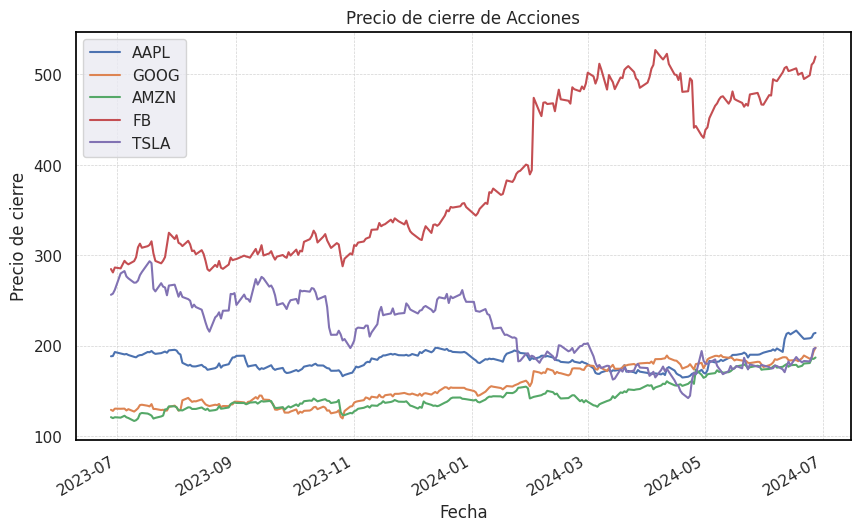

In [ ]:
# Graficar
df_comp.plot(figsize=(10, 6))  # Se agregaron comas para separar los nombres de los tickers
plt.title('Precio de cierre de Acciones')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.grid(True, color='lightgrey', linestyle='--', linewidth=0.5)  # Ajustar el estilo de las cuadrículas
plt.legend(labels=['AAPL', 'GOOG', 'AMZN', 'FB', 'TSLA'])  # Se agregaron etiquetas para las leyendas

# Cambiar el color del área dentro de la gráfica a blanco
plt.gca().set_facecolor('white')

# Cambiar el color de los bordes de la gráfica a negro
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')

plt.show()

Durante el periodo 07/2023 -07/2024, se concluye lo siguiente:
* Meta es el que ha presentado un aumento de precio, desde inicio del 2024
* Tesla a inicios del 2024 ha caido su precio que estaba de subida.
* Apple es el más estable durante el periodo y desde Mayo 2024 está de subida.
* Amazon y Google se registraron un crecimiento minimo.

##2.2 Análisis Descriptivo (Rendimientos)

In [ ]:
df_comp.pct_change() #Tabla de Rendimiento [(Precio de cierre ajustado(t+1)  - Precio de cierre ajustado(t)) / Precio de cierre ajustado(t) *100]

Ticker,AAPL,AMZN,GOOG,META,TSLA
Date,,,,,
2023-06-28,NaN,NaN,NaN,NaN,NaN
2023-06-29,0.001797,-0.008834,-0.008837,-0.013180,0.004917
2023-06-30,0.023103,0.019234,0.007999,0.019359,0.016582
2023-07-03,-0.007785,-0.001074,-0.003389,-0.003345,0.068954
2023-07-05,-0.005871,0.001229,0.017170,0.029194,0.009506
...,...,...,...,...,...
2024-06-21,-0.010444,0.016013,0.014349,-0.013793,0.007931
2024-06-24,0.003133,-0.018564,0.002940,0.008347,-0.002350
2024-06-25,0.004468,0.004149,0.026495,0.023431,0.026126


In [ ]:
returns = df_comp.pct_change().dropna() #Agregarlo en una variable los rendimeintos para analizarlos y eliminamos la primera fila

In [ ]:
#Analizar Estadisticos Descriptivos
media = returns.mean()
std = returns.std()
correlacion = returns.corr()
# Calcular el VaR al 95%
var_95 = returns.quantile(0.05)

In [ ]:
# Crear una tabla resumen
tabla_resumen = pd.concat([media, std, var_95], axis=1)
tabla_resumen.columns = ['Media', 'Desviación estándar', 'VaR al 95%']
print('\nTabla resumen:')
print(tabla_resumen)



Tabla resumen:
           Media  Desviación estándar  VaR al 95%
Ticker                                           
AAPL    0.000607             0.013792   -0.020525
AMZN    0.001855             0.017489   -0.024690
GOOG    0.001885             0.017339   -0.021697
META    0.002643             0.022483   -0.025412
TSLA   -0.000544             0.031653   -0.041750


* El activo con mayor rendimiento en promedio durante el año es Meta, seguido de Amazon, por último Tesla
* El activo con menor varaición respecto a la media de sus rendimientos es Apple, seguido de google, por último es Tesla
* Apple y Google presentan la correlación más alta, generando una diversificación no efectiva, siendo la misma sector e industria poco relacionadas.

Ticker      AAPL      AMZN      GOOG      META      TSLA
Ticker                                                  
AAPL    1.000000  0.264950  0.350864  0.243763  0.345807
AMZN    0.264950  1.000000  0.529547  0.601915  0.228701
GOOG    0.350864  0.529547  1.000000  0.393999  0.158022
META    0.243763  0.601915  0.393999  1.000000  0.152810
TSLA    0.345807  0.228701  0.158022  0.152810  1.000000


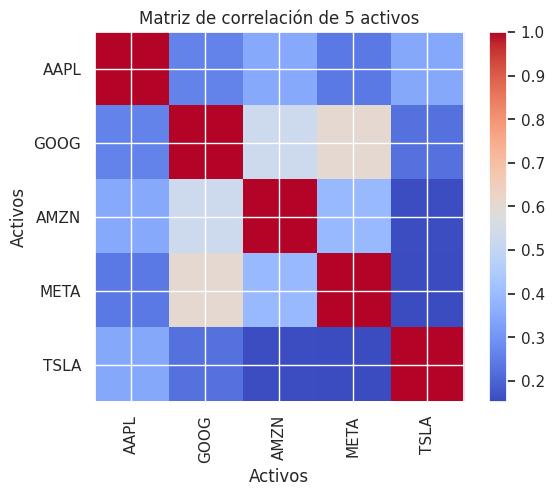

In [ ]:
# Correlación

print(correlacion)

plt.imshow(correlacion, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(correlacion.columns)), labels=['AAPL', 'GOOG', 'AMZN', 'META', 'TSLA'], rotation=90)
plt.yticks(range(len(correlacion.columns)), labels=['AAPL', 'GOOG', 'AMZN', 'META', 'TSLA'])
plt.title('Matriz de correlación de 5 activos')
plt.xlabel('Activos')  # Agregar etiqueta al eje x
plt.ylabel('Activos')  # Agregar etiqueta al eje y
plt.show()

2.2.1 Gráfico de Rendimientos

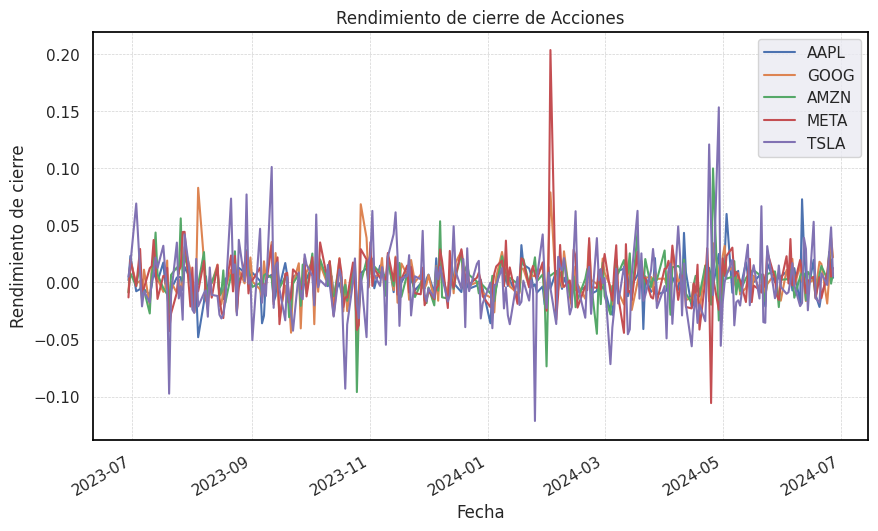

In [ ]:
# Graficar
returns.plot(figsize=(10, 6))  # Se agregaron comas para separar los nombres de los tickers
plt.title('Rendimiento de cierre de Acciones')
plt.xlabel('Fecha')
plt.ylabel('Rendimiento de cierre')
plt.grid(True, color='lightgrey', linestyle='--', linewidth=0.5)  # Ajustar el estilo de las cuadrículas
plt.legend(labels=['AAPL', 'GOOG', 'AMZN', 'META', 'TSLA'])  # Se agregaron etiquetas para las leyendas

# Cambiar el color del área dentro de la gráfica a blanco
plt.gca().set_facecolor('white')

# Cambiar el color de los bordes de la gráfica a negro
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')

plt.show()

## 3. Valuación de Portafolio

In [ ]:
# Matriz de varianzas y covarianzas
cov_matrix = returns.cov()  # Calcula la matriz de covarianzas de los retornos
cov_matrix  # Muestra la matriz de covarianzas

Ticker,AAPL,AMZN,GOOG,META,TSLA
Ticker,,,,,
AAPL,0.000190,0.000064,0.000084,0.000076,0.000151
AMZN,0.000064,0.000306,0.000161,0.000237,0.000127
GOOG,0.000084,0.000161,0.000301,0.000154,0.000087
META,0.000076,0.000237,0.000154,0.000506,0.000109
TSLA,0.000151,0.000127,0.000087,0.000109,0.001002


* La matriz de covarianzas se utiliza para entender y gestionar el riesgo. Permite calcular la varianza total (riesgo) de la cartera, considerando no solo la volatilidad individual de los activos, sino también cómo interactúan entre sí. En términos de optimización, se busca una combinación de activos que minimice el riesgo (varianza de la cartera) para un nivel dado de retorno esperado, o maximice el retorno para un nivel dado de riesgo

In [ ]:
# Se establece un vector pesos "weights" para las Acciones
# weights = cvx.Variable(len(tickers),1, name='weights')
weights = cvx.Variable(len(tickers))
weights

Variable((5,), var1)

In [ ]:
# Calculamos el promedio de los retornos diarios (Forma matricial)
import numpy as np  # Importa la librería numpy para operaciones numéricas
expected_returns = np.array(returns.mean())  # Calcula el promedio de los retornos diarios y lo convierte en un array de numpy
# expected_returns = np.round(expected_returns, 4)  # Redondea los retornos esperados a 4 decimales (opcional, comentado)
expected_returns  # Muestra los retornos esperados

array([ 0.00060701,  0.0018552 ,  0.00188481,  0.00264329, -0.00054385])

#### El resultado array representa los retornos diarios promedio de cada uno de los activos en el portafolio. Cada valor en el array corresponde al promedio de los retornos diarios para un activo específico (en el mismo orden que los activos en la matriz de covarianzas o en el DataFrame original de retornos).
* 0.00060701: Retorno promedio diario del primer activo (por ejemplo, AAPL).
* 0.0018552: Retorno promedio diario del segundo activo (por ejemplo, AMZN).
* 0.00188481: Retorno promedio diario del tercer activo (por ejemplo, GOOG).
* 0.00264329: Retorno promedio diario del cuarto activo (por ejemplo, META).
* -0.00054385: Retorno promedio diario del quinto activo (por ejemplo, TSLA).

#### Este array es crucial para la optimización de la cartera, ya que proporciona los rendimientos esperados que se utilizarán en la función objetivo para maximizar los retornos ajustados por riesgo

## 3. Buscamos maximizar el rendimiento de las acciones

##Teoría Económica

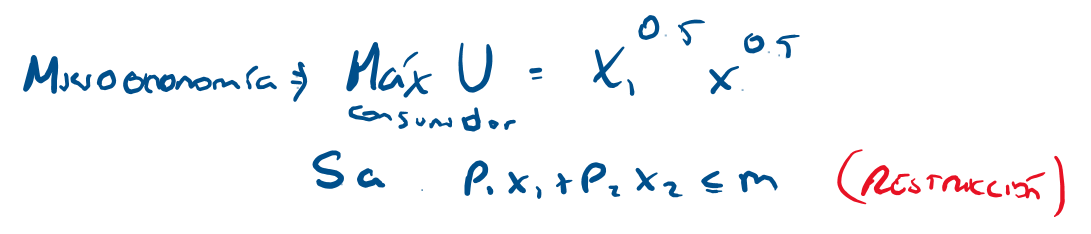

* U : Utilidad del Portafolio
* Xi = Rp : Rendimientos de activos
* x : Riesgo
* Nota 1 : Es una función Coub Douglas, debido a la incertidumbre
* Nota 2: Los 0.5 son las probabilidades de la situación
* Sa : Restricciones del Portafolio
* Pi : Son los pesos o números de acciones del portafolio
* P1 + P2 = Wi : Vector Peso
* m : Inversion disponible para invertir en el portafolio

* Nota: Dependerá de las politicas de la inversión la optimización

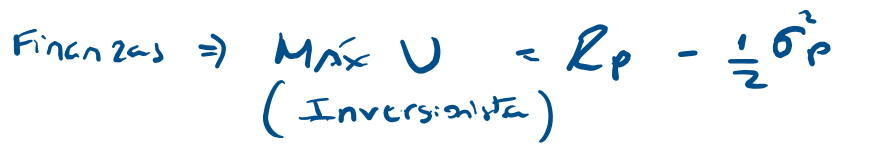

In [ ]:
#Funcion Objetivo

target_return = 0.1
rf = 0.3
#Definir la expresión para maximizar los retorno
#objective = cvx.Maximize(expected_returns.T @ weights)

#Definir la expresión para maximizar la utilidad
objective = cvx.Maximize(expected_returns.T @ weights - cvx.quad_form(weights, cov_matrix) * 0.5)

# Definir la expresión de maximización del Ratio de Sharpe
#objective = cvx.Maximize((expected_returns.T @ weights - rf) / cvx.sqrt(weights.T @ cov_matrix @ weights))

# Definir la expresión para minimizar la varianza
#objective = cvx.Minimize(cvx.quad_form(weights, cov_matrix))

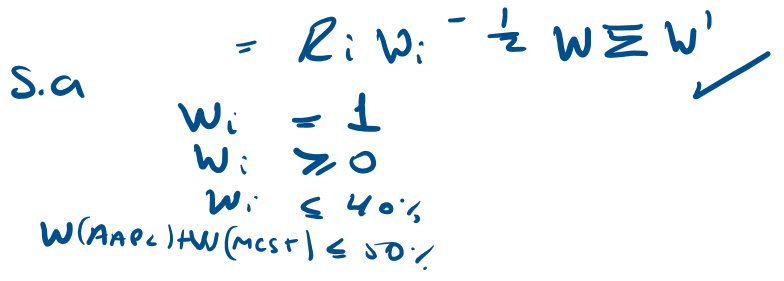

In [ ]:
# Restricciones
constraints = [
    cvx.sum(weights) == 1,  # La suma de los pesos debe ser igual a 1 (cartera completamente invertida)
    weights >= 0,  # Los pesos deben ser mayores o iguales a 0 (no se permiten posiciones cortas)
    weights <= 0.4,  # Cada peso individual no debe exceder el 40%
    weights[tickers.index('AAPL')] + weights[tickers.index('META')] <= 0.5,  # La suma de los pesos de AAPL y META no debe exceder el 50%
]

In [ ]:
#Optimización
problem = cvx.Problem(objective, constraints)
result = problem.solve()


In [ ]:
#Imprimimos los resultados
for i, ticker in enumerate(tickers):
    print(f"{ticker}: {weights.value[i]*100:.2f}%")


AAPL: 0.00%
GOOG: 20.00%
AMZN: 40.00%
META: 40.00%
TSLA: 0.00%


#### La asignación óptima indica que, bajo las restricciones y la función objetivo definida, la combinación de 20% GOOG, 40% AMZN, y 40% META maximiza el retorno ajustado por riesgo.
#### No incluir AAPL y TSLA en la cartera optimizada sugiere que, en este contexto particular, estos activos no contribuyen favorablemente al perfil de riesgo-retorno deseado.